<a href="https://colab.research.google.com/github/ahoucbvtw/Minst-Pratice/blob/main/Minst_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Keras→tensorflow.keras 現在改成import後面的
# 如果要用GPU，一定要裝CUDA+Cudnn(加速器)
# 此題可以先將圖片讀近來，一般來說不能先讀，因為這樣會把RAM弄爆
from tensorflow.keras.datasets.mnist import load_data
# load_data()→((訓練圖片,訓練答案), (驗證圖片, 驗證答案))
(traindata, trainanswer), (testdata, testanswer) = load_data()

In [ ]:
# 查看這些圖片的資料大小
print(traindata.shape)
print(trainanswer.shape)
print(testdata.shape)
print(testanswer.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3


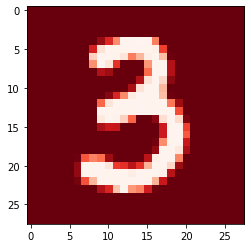

In [ ]:
# 查看設定的顏色↓
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 59999)
print(trainanswer[idx])
# 將圖周為標示取消"
plt.axis("off")
# 更改顏色 cmap="gray"
plt.imshow(traindata[idx], cmap="Reds_r")

In [ ]:
import pandas as pd
pd.DataFrame(traindata[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,25,78,156,253,253,255,253,144,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,71,227,252,252,252,252,253,252,247,99,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,211,253,252,251,231,143,188,247,252,194,4,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,158,253,231,86,0,0,0,163,252,252,42,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,42,28,0,0,0,0,128,252,252,42,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,227,253,216,18,0,0,0,0,0,0,0,0,0


In [ ]:
# 建立深度神經網路模型
# Layers:Dense(全連接層)
# keras.layers.Dense(units(此層需要多少個神經元), activation(激活函式,中間relu最後softmax或sigmoid))

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
layers = [
        #   784 * 128(連線各數) + 128(bias) parameter需要調整參數
        # param計算 第1層:(784*128)+(128個輸出(神經元)表示有128個激活函式=>而一個激活函式就配一個偏差bias) = 100480
          Dense(128, activation = "relu", input_dim = 784),#第一層時要給輸入有多少,input_dim輸入預設的圖片size(28*28),128為自己設定的第2層神經集合(通常為2的次方256/128/64)
        #   128 * 10(最後答案10個選項) + 10(bias) parameter需要調整參數
        # param計算 第2層:(128*10)+(10個輸出(神經元)表示有10個激活函式=>而一個激活函式就配一個偏差bias) = 1290
          Dense(10, activation = "softmax")#最後一層,10為自己設定最後的神經集合
]
model = Sequential(layers)
# 看模型長的樣子
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile:確定模型訓練方式等...(建模)
# 隨機梯度下降:隨便選一weights,往正確的方向下降
# if 算回歸問題loss則會改成MSE或MAE等

# 交插商Cross Entropy(機率用這個，but此為使用像素去做比對分類較不準)
# p = 預測機率(亂度衡量距離)
# p1 * log(1/q1) + p2 * log(1/q2)....
# Loss: 多個神經元:Categorcial CrossEntropy ; 一個神經元:Binary CrossEntropy 
# 當跟正確答案差很多時(Loss大)，坡度要大
# 當與正確答案差很小時,坡度要小
# optimizer:下降時機於動量(行走時有動量累計並非等速移動)

from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss = CategoricalCrossentropy(),
              optimizer="adam",
              metrics = ["accuracy"])

In [ ]:
# 答案預處理OneHotEncoding: 答案的部分trainanswer testanswer 
# 希望的輸出答案 [P0, P1, P2, ... , P9]
# => [0.2, 0, 0, 0.79, 0, 0, 0.01, 0, 0, 0] 所以此圖答案最有可能為4
from tensorflow.keras.utils import to_categorical
trainanswer_cat = to_categorical(trainanswer, num_classes = 10)
testanswer_cat = to_categorical(testanswer, num_classes = 10)
print(trainanswer[0])
print(trainanswer_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 資料預處理Normalize: 輸入的部分traindata testdata
# 使用tensorflow函式處理MLP一定要Normalize => 0~1 or -1~1攤開降為1維
# reshape: -1(numpy會幫忙計算-1值會是多少，但最多只能一個)
traindata_norm = traindata.reshape(-1, 784) / 255
testdata_norm = testdata.reshape(-1, 784) / 255
print(traindata_norm.shape)
print(testdata_norm.shape)

(60000, 784)
(10000, 784)


In [ ]:
# validation_split 分割訓練資料和答案(拆成訓練+驗證),因為訓練資料Loss一定越訓練越小，所以要拿一沒看過的驗證資料去當做真正的Loss
# batch_size 看多少筆後再做一次梯度下降修正(20~200)
# epochs 整份訓練資料需要看幾次
# ex: 10次epochs,200筆batch_size => 總共60000筆訓練資料 * 10次epochs / 200 = 調整3000(次)梯度下降修正
# verbose(進度條) 0(全完不印) 1(default) 2(one line per epoch)
# fit完看val_loss的值(驗證Loss)，若其中有個值很小且後面5個都大於它，則最小值就是最後答案
# val_accuracy 為驗證Loss的準確率

# 此為加速訓練結束
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x = traindata_norm, y = trainanswer_cat,
        validation_split = 0.1,
        batch_size = 200, epochs = 100, verbose = 2, callbacks = callbacks)

Epoch 1/100
270/270 - 1s - loss: 0.4380 - accuracy: 0.8785 - val_loss: 0.1953 - val_accuracy: 0.9432
Epoch 2/100
270/270 - 1s - loss: 0.2015 - accuracy: 0.9426 - val_loss: 0.1379 - val_accuracy: 0.9623
Epoch 3/100
270/270 - 1s - loss: 0.1487 - accuracy: 0.9577 - val_loss: 0.1174 - val_accuracy: 0.9660
Epoch 4/100
270/270 - 1s - loss: 0.1185 - accuracy: 0.9661 - val_loss: 0.0995 - val_accuracy: 0.9718
Epoch 5/100
270/270 - 1s - loss: 0.0978 - accuracy: 0.9719 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 6/100
270/270 - 1s - loss: 0.0825 - accuracy: 0.9759 - val_loss: 0.0857 - val_accuracy: 0.9747
Epoch 7/100
270/270 - 1s - loss: 0.0693 - accuracy: 0.9807 - val_loss: 0.0828 - val_accuracy: 0.9760
Epoch 8/100
270/270 - 1s - loss: 0.0603 - accuracy: 0.9830 - val_loss: 0.0784 - val_accuracy: 0.9762
Epoch 9/100
270/270 - 1s - loss: 0.0521 - accuracy: 0.9851 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 10/100
270/270 - 1s - loss: 0.0455 - accuracy: 0.9876 - val_loss: 0.0751 - val_accura

In [ ]:
model.evaluate(x = testdata_norm, y = testanswer_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9787


[0.07338346540927887, 0.9786999821662903]

In [ ]:
# predict只會列出機率;predict_classes:會列出分類
# confusion_matrix混淆矩陣: 可以找出哪些預測錯誤的地方
from sklearn.metrics import  confusion_matrix
pre = model.predict_classes(testdata_norm)
mat = confusion_matrix(testanswer, pre)
pd.DataFrame(mat, columns=["{}(預測)".format(i) for i in range(10)],
       index=["{}(真正)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),971,0,1,1,0,2,1,1,1,2
1(真實),0,1124,2,1,0,1,2,1,4,0
2(真實),6,0,1008,1,2,0,2,6,5,2
3(真實),0,0,4,986,0,7,0,3,4,6
4(真實),1,0,4,1,961,0,2,1,1,11
5(真實),2,0,0,5,1,878,4,1,1,0
6(真實),5,2,1,1,4,8,933,0,4,0
7(真實),0,3,7,6,0,1,0,1003,1,7
8(真實),3,1,2,4,6,5,2,7,941,3
9(真實),1,2,0,5,8,6,0,5,0,982


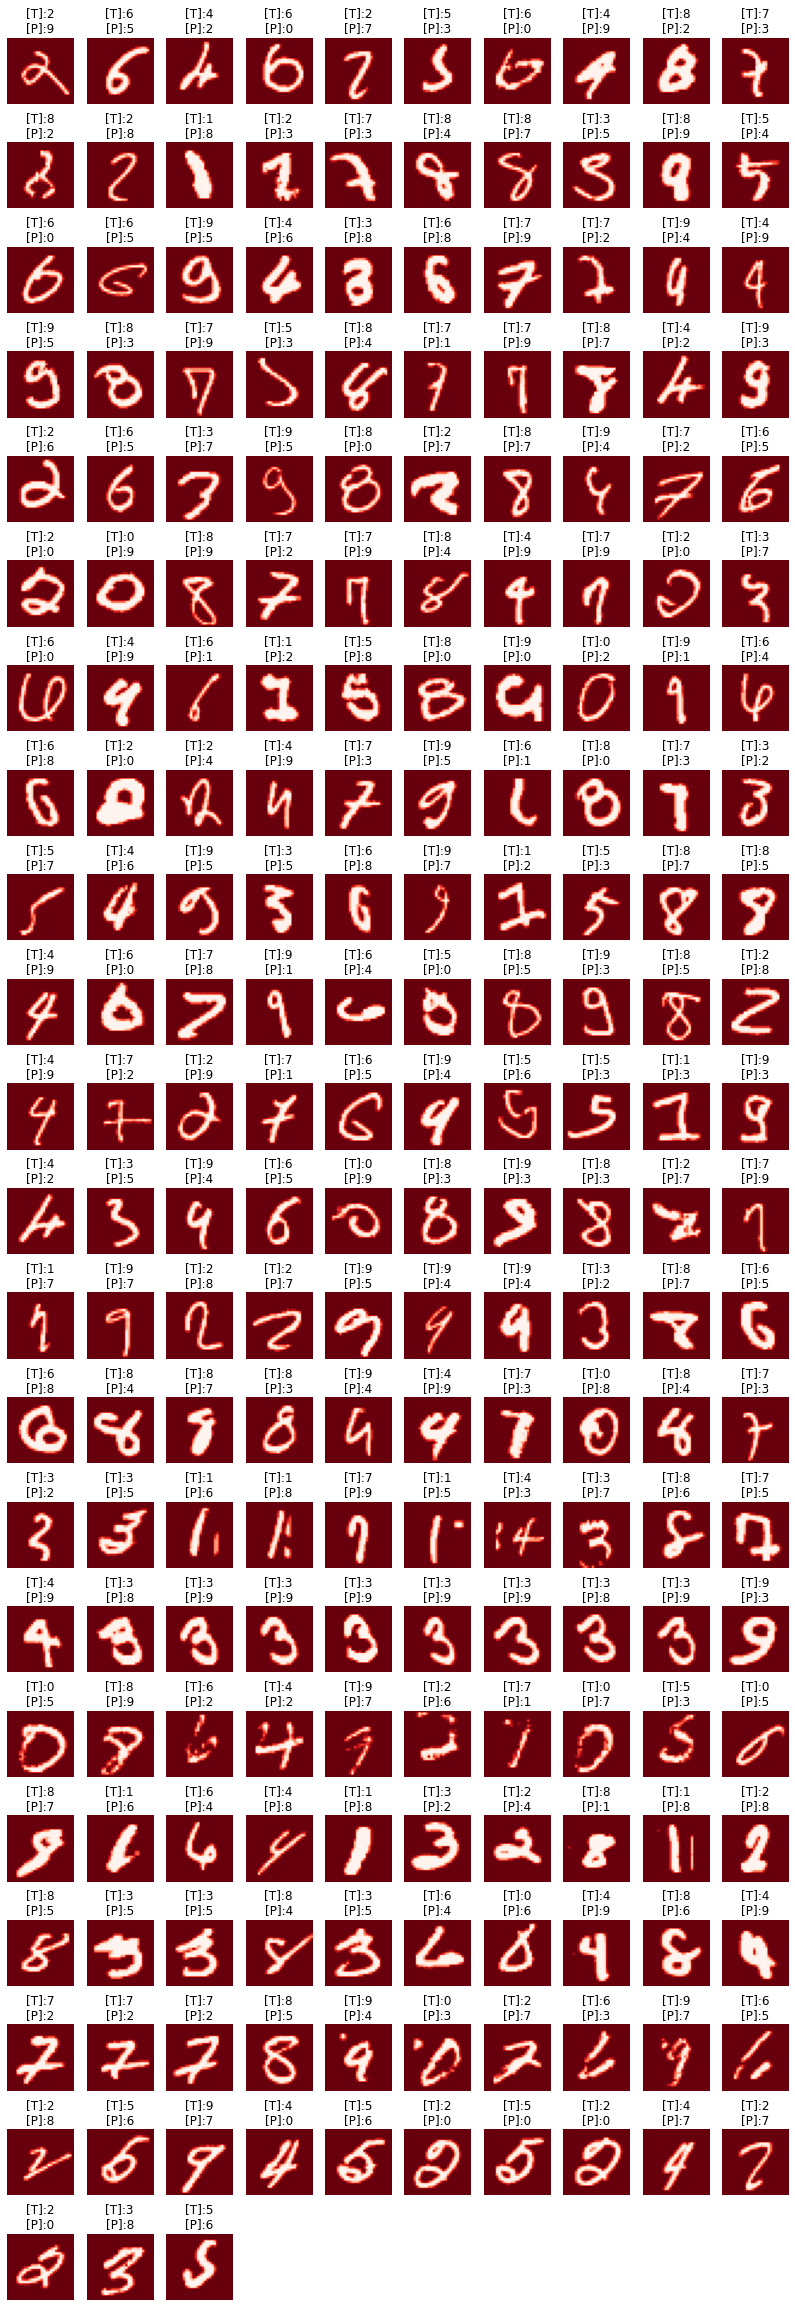

In [ ]:
# 找出所有預測錯誤的圖
# MLP缺點 利用像素的缺or補上去判斷特徵
import numpy as np
idx = np.nonzero(pre != testanswer)[0]
img, label, p = testdata[idx], testanswer[idx], pre[idx]

# 整張圖的長寬
plt.figure(figsize=(14, 42))
# 每個列固定放10張圖
width = 10
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(label[i], p[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i], cmap="Reds_r")

檔案:5.png
答案: 5
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.009
3 的機率: 0.075
4 的機率: 0.0
5 的機率: 0.786
6 的機率: 0.007
7 的機率: 0.001
8 的機率: 0.121
9 的機率: 0.0


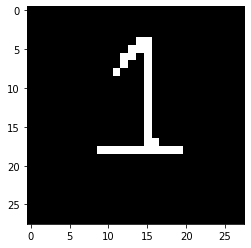

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
input_file = input("檔案:")
img = load_img(input_file, target_size=(28,28)).convert("L")
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)
print("答案:", ans[0])
prob = model.predict(img_norm)[0]
for i, p in enumerate(prob):
    print(i, "的機率:", round(p, 3))
plt.imshow(img, cmap="gray")

In [ ]:
# 隨時存取model
# model.save("122.h5")

# 隨時讀取model
from tensorflow.keras.models import load_model
load= load_model("mlp.h5")
load.evaluate(testdata_norm, testanswer_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9787


[0.07338346540927887, 0.9786999821662903]